# Project 3 - Developer Salary Prediction in 2024 - Pycaret

- Modelling Developer Salary Prediction with **Pycaret**

- Course Name :         Applied Machine Learning
- Course instructor:    Sohail Tehranipour
- Student Name :        Afshin Masoudi Ashtiani
- Project 2 -           Developer Salary Prediction in 2024
- Date :                September 2024
- File(ipynb) :         3/5

## Step 1 : Install required libraries

In [1]:
# install full version
!pip install wandb joblib
!pip install pycaret[full] autoviz

## Step 2 : Import required libraries

In [4]:
import pandas as pd
import wandb
import pycaret
from pycaret.regression import *

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Step 3 : Load and Prepare data

- Load the dataset

In [5]:
# Load the dataset
dataset_path = '/content/drive/My Drive/Applied Machine Learning/Project 3 : Developer Salary Prediction/datasets/cleaned_survey_results_public_v2.csv'
# dataset_path = r'C:\Users\Afshin\Desktop\10_Projects\Project_3_Developer_Salary_Prediction\datasets\cleaned_survey_results_public_v2.csv'

df = pd.read_csv(dataset_path)
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13908 entries, 0 to 13907
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CompTotal          13908 non-null  float64
 1   YearsOfExperience  13908 non-null  float64
 2   MainBranch         13908 non-null  object 
 3   Country            13908 non-null  object 
 4   EducationLevel     13908 non-null  object 
 5   RemoteWork         13908 non-null  object 
 6   Salary             13908 non-null  float64
dtypes: float64(3), object(4)
memory usage: 760.7+ KB


,CompTotal,YearsOfExperience,MainBranch,Country,EducationLevel,RemoteWork,Salary
0,28000.0,6.0,Developer,Austria,Upper than Master's degree,Hybrid,30074.0
1,85000.0,6.0,Profession,Turkey,Master's degree,Remote,91295.0
2,50000.0,17.0,Profession,France,Master's degree,Remote,53703.0
3,110000.0,7.0,Profession,United States of America,Less than Bachelor's degree,Remote,110000.0
4,126420.0,18.0,Profession,United Kingdom of Great Britain and Northern I...,Upper than Master's degree,Hybrid,161044.0


## Step 4 : Set Up the PyCaret Environment
Initialize in PyCaret

- extract the columns with object, number, bool datatypes

In [6]:
# Identify feature types
numeric_features = df.select_dtypes(include=['number']).columns.tolist()[:-1]
boolean_features = df.select_dtypes(include=['bool']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print(f'> Numeric Features     is {numeric_features}')
print(f'> Boolean Features     is {boolean_features}')
print(f'> Categorical Features is {categorical_features}')

> Numeric Features     is ['CompTotal', 'YearsOfExperience']
> Boolean Features     is []
> Categorical Features is ['MainBranch', 'Country', 'EducationLevel', 'RemoteWork']


In [7]:
# init setup
from pycaret.regression import *

# Set up the regression problem in PyCaret
# Note: specify the column names according to your actual dataset
regression_setup = setup(
    data= df,
    target= 'Salary',
    fold= 20,
    train_size= 0.9,
    normalize= True,  # Enable normalization
    normalize_method='minmax',
    numeric_features= numeric_features,
    categorical_features= categorical_features,
    log_experiment= 'wandb',
    experiment_name= '2024_Developer_Salary_Prediction_Pycaret_WandB',
    session_id=123)

,Description,Value
0,Session id,123
1,Target,Salary
2,Target type,Regression
3,Original data shape,"(13908, 7)"
4,Transformed data shape,"(13908, 12)"
5,Transformed train set shape,"(12517, 12)"
6,Transformed test set shape,"(1391, 12)"
7,Numeric features,2
8,Categorical features,4
9,Preprocess,True


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: ERROR API key must be 40 characters long, yours was 101


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


 ··········


## Step 5 : Train
Training in PyCaret

In [8]:
# compare baseline models
top3_models = compare_models(n_select= 3, turbo=True)
top3_models

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,3641.3617,104465991.3785,10136.2222,0.9452,0.2030,0.0887,3.9185
xgboost,Extreme Gradient Boosting,3717.6266,114933614.8000,10641.2941,0.9396,0.2183,0.0905,1.9260
lightgbm,Light Gradient Boosting Machine,3861.2667,116905859.7547,10741.6834,0.9386,0.2135,0.0931,0.6860
rf,Random Forest Regressor,3310.5725,124971857.5675,11084.7035,0.9342,0.2100,0.0845,2.9415
et,Extra Trees Regressor,4179.4550,145975827.3274,12021.5426,0.9232,0.2254,0.1010,3.0610
gbr,Gradient Boosting Regressor,6603.6076,176686581.4370,13261.5355,0.9073,0.2489,0.1438,0.9925
dt,Decision Tree Regressor,3568.9852,218426693.6777,14676.8913,0.8849,0.2671,0.0878,0.1965
knn,K Neighbors Regressor,11325.5678,362618252.8000,19019.7377,0.8092,0.3165,0.2264,0.3775
ada,AdaBoost Regressor,14492.3240,423110392.8355,20560.3788,0.7775,0.3518,0.2893,0.4700
br,Bayesian Ridge,20847.3651,752390912.8764,27416.8276,0.6044,0.4369,0.3967,0.2450


Processing:   0%|          | 0/87 [00:00<?, ?it/s]

 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=123,
              reg_alpha=0, reg_lambda=1, ...),
 LGBMRegressor(n_jobs=-1, random_state=123)]

## Step 6 : Optimize
Optimization in PyCaret

- **Tune models**

In [9]:
# tune model
tuned_top3_models = [tune_model(model, choose_better= True) for model in top3_models]
tuned_top3_models

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4294.5844,159737666.7130,12638.7368,0.9182,0.2289,0.1024
1,3613.0300,103300887.5934,10163.7044,0.9470,0.1825,0.0867
2,4295.6249,117178969.2112,10824.9235,0.9392,0.2518,0.1288
3,3533.0653,70439171.0600,8392.8047,0.9628,0.1712,0.0807
4,4540.1448,163575017.5801,12789.6449,0.9212,0.2299,0.1045
5,4402.3026,112408623.6778,10602.2933,0.9369,0.2491,0.1147
6,4251.8596,101068266.3778,10053.2714,0.9486,0.2294,0.1090
7,3703.6242,86636597.3892,9307.8782,0.9515,0.1728,0.0790
8,3454.9773,97121561.9915,9855.0272,0.9477,0.2012,0.0881


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 20 folds for each of 10 candidates, totalling 200 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4504.7588,174209888.0000,13198.8594,0.9108,0.2478,0.1091
1,3947.0076,110022672.0000,10489.1689,0.9435,0.1968,0.0949
2,4421.9849,123995968.0000,11135.3477,0.9356,0.2595,0.1379
3,3628.4170,78407208.0000,8854.7842,0.9586,0.1851,0.0838
4,4582.4937,157421536.0000,12546.7744,0.9241,0.2312,0.1074
5,4779.7485,125504120.0000,11202.8623,0.9295,0.2553,0.1229
6,4337.9497,106064864.0000,10298.7793,0.9460,0.2456,0.1153
7,4134.3257,111026176.0000,10536.8955,0.9379,0.2063,0.0837
8,3807.9546,108540072.0000,10418.2568,0.9415,0.2035,0.0929


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 20 folds for each of 10 candidates, totalling 200 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,5455.0411,195676866.3288,13988.4548,0.8998,0.2651,0.1276
1,4741.6356,143072860.4124,11961.3068,0.9266,0.2193,0.1170
2,4783.1086,108329540.4638,10408.1478,0.9438,0.2436,0.1339
3,4545.3187,86815159.8173,9317.4653,0.9542,0.2182,0.0984
4,5404.7949,170186988.6170,13045.5735,0.9180,0.2336,0.1173
5,5788.9403,142261028.0905,11927.3228,0.9201,0.2893,0.1518
6,5239.3295,114880905.2504,10718.2510,0.9415,0.3865,0.1243
7,4855.3847,108064786.8842,10395.4214,0.9395,0.2126,0.0952
8,4723.9380,122366259.8918,11061.9284,0.9341,0.2319,0.1143


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 20 folds for each of 10 candidates, totalling 200 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=123,
              reg_alpha=0, reg_lambda=1, ...),
 LGBMRegressor(n_jobs=-1, random_state=123)]

- **Ensemble model**

In [10]:
# ensemble model
bagged_top3_models = [ensemble_model(model, choose_better= True) for model in top3_models]
bagged_top3_models

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3804.0543,151892735.5773,12324.4771,0.9222,0.2396,0.1003
1,3267.6010,107826561.9656,10383.9570,0.9446,0.1874,0.0825
2,3605.2469,98183946.0931,9908.7813,0.9490,0.2355,0.1140
3,3113.7323,67190965.5592,8197.0095,0.9645,0.1840,0.0783
4,4153.7222,169235199.9996,13009.0430,0.9184,0.2322,0.0994
5,4272.9467,120009422.1679,10954.8812,0.9326,0.2403,0.1160
6,3772.2314,104912608.1543,10242.6856,0.9466,0.2336,0.1076
7,3374.7458,85890755.7188,9267.7266,0.9519,0.1825,0.0745
8,3083.0600,97772304.7357,9887.9879,0.9473,0.2063,0.0859


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Original model was better than the ensembled model, hence it will be returned. NOTE: The display metrics are for the ensembled model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3747.6948,156679952.0000,12517.1865,0.9198,0.2374,0.0957
1,3191.3938,103837136.0000,10190.0508,0.9467,0.1894,0.0804
2,3674.8962,111066784.0000,10538.8223,0.9423,0.2470,0.1193
3,2767.0476,60788036.0000,7796.6685,0.9679,0.1656,0.0700
4,3926.3066,166435888.0000,12901.0029,0.9198,0.2276,0.0955
5,4095.9829,127655960.0000,11298.4941,0.9283,0.2365,0.1096
6,3592.4041,100012624.0000,10000.6309,0.9491,0.2266,0.0984
7,3205.9509,87835120.0000,9372.0391,0.9509,0.1729,0.0693
8,3019.0994,100998544.0000,10049.8027,0.9456,0.2036,0.0799


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4262.1180,171377647.3119,13091.1286,0.9123,0.2506,0.1080
1,3399.3575,101570607.2370,10078.2244,0.9479,0.1915,0.0825
2,3819.4848,111319479.6201,10550.8047,0.9422,0.2485,0.1236
3,3113.6226,72057229.0191,8488.6530,0.9620,0.1756,0.0756
4,4219.2134,168269892.1969,12971.8885,0.9189,0.2232,0.0968
5,4407.6282,123145103.1763,11097.0763,0.9308,0.2344,0.1147
6,4133.2991,123484192.3451,11112.3441,0.9371,0.2399,0.1160
7,3557.0995,102351066.1121,10116.8704,0.9427,0.1766,0.0739
8,3242.8615,95806123.7473,9788.0603,0.9484,0.2025,0.0868


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Original model was better than the ensembled model, hence it will be returned. NOTE: The display metrics are for the ensembled model (not the original one).


 BaggingRegressor(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                         callbacks=None, colsample_bylevel=1,
                                         colsample_bynode=1, colsample_bytree=1,
                                         early_stopping_rounds=None,
                                         enable_categorical=False,
                                         eval_metric=None, gamma=0, gpu_id=-1,
                                         grow_policy='depthwise',
                                         importance_type=None,
                                         interaction_constraints='',
                                         learning_rate=0.300000012, max_bin=256,
                                         max_cat_to_onehot=4, max_delta_step=0,
                                         max_depth=6, max_leaves=0,
                                         min_child_weight=1, missing=nan,
                                         monotone_

In [11]:
# ensemble model
boosted_top3_models = [ensemble_model(model, method= 'Boosting', choose_better= True) for model in top3_models]
boosted_top3_models

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,5180.6839,179712189.7144,13405.6775,0.9080,0.2691,0.1284
1,4528.6950,125555907.2624,11205.1732,0.9355,0.2050,0.1021
2,4812.7290,118433557.4004,10882.7183,0.9385,0.2601,0.1365
3,4359.2019,92117200.6009,9597.7706,0.9514,0.2124,0.0976
4,4999.8909,166716639.8765,12911.8798,0.9197,0.2349,0.1100
5,5585.1688,143756715.2734,11989.8589,0.9193,0.2820,0.1378
6,5196.1997,130700515.4648,11432.4326,0.9335,0.3208,0.1378
7,4581.7085,104609915.0031,10227.8989,0.9415,0.2055,0.0929
8,4426.2730,116809907.2971,10807.8632,0.9371,0.2266,0.1103


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Original model was better than the ensembled model, hence it will be returned. NOTE: The display metrics are for the ensembled model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4617.7324,169385376.0000,13014.8135,0.9133,0.2717,0.1163
1,4179.3555,134001688.0000,11575.9102,0.9312,0.3394,0.1022
2,4245.7954,114992936.0000,10723.4756,0.9403,0.2423,0.1205
3,3679.1311,75742616.0000,8703.0234,0.9600,0.1954,0.0846
4,4545.5830,165162688.0000,12851.5635,0.9204,0.2409,0.1026
5,5052.3042,153323280.0000,12382.3779,0.9139,0.2930,0.1289
6,4677.6299,134012800.0000,11576.3896,0.9318,0.2691,0.1220
7,4101.0210,99951432.0000,9997.5713,0.9441,0.1971,0.0857
8,4149.1719,124715992.0000,11167.6318,0.9328,0.2363,0.1000


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Original model was better than the ensembled model, hence it will be returned. NOTE: The display metrics are for the ensembled model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,5465.9153,182488402.0847,13508.8268,0.9066,0.2560,0.1318
1,4429.3833,119970295.7108,10953.0953,0.9384,0.2032,0.1052
2,5028.3708,122080170.2146,11048.9896,0.9366,0.2487,0.1380
3,4299.7307,83057432.2020,9113.5850,0.9562,0.1862,0.0968
4,5141.8115,158856197.3545,12603.8168,0.9234,0.2345,0.1180
5,5589.6902,143553715.6507,11981.3904,0.9194,0.2460,0.1366
6,5125.6349,117437026.1197,10836.8365,0.9402,0.2472,0.1274
7,4498.9566,100695901.5859,10034.7348,0.9437,0.1850,0.0930
8,4604.7281,121453855.4824,11020.6105,0.9346,0.2221,0.1135


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Original model was better than the ensembled model, hence it will be returned. NOTE: The display metrics are for the ensembled model (not the original one).


 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=123,
              reg_alpha=0, reg_lambda=1, ...),
 LGBMRegressor(n_jobs=-1, random_state=123)]

- **Automl**

In [12]:
best_model = automl()
best_model

## Step 7 : Analyze
Analysis and model explainability in PyCaret

- **Evaluate model**

In [13]:
# launch evaluate widget
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

- **SHAP** Values


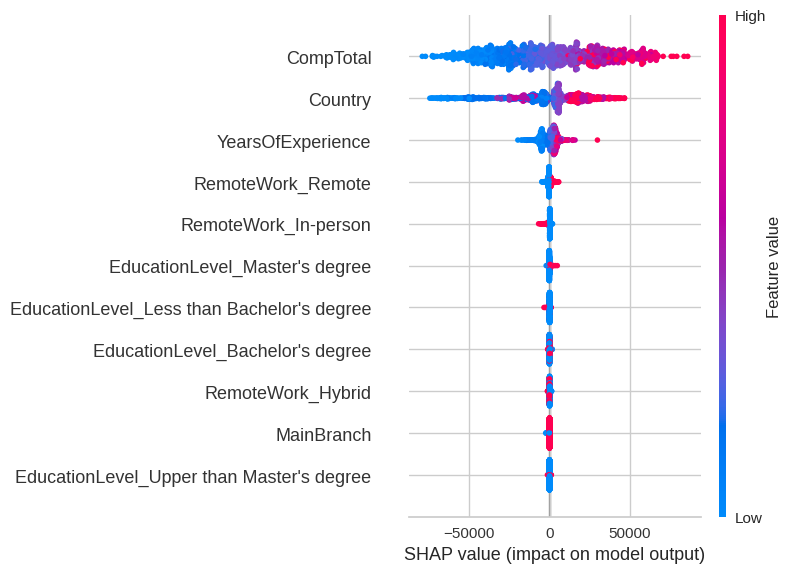

In [14]:
# interpret model
interpret_model(best_model)

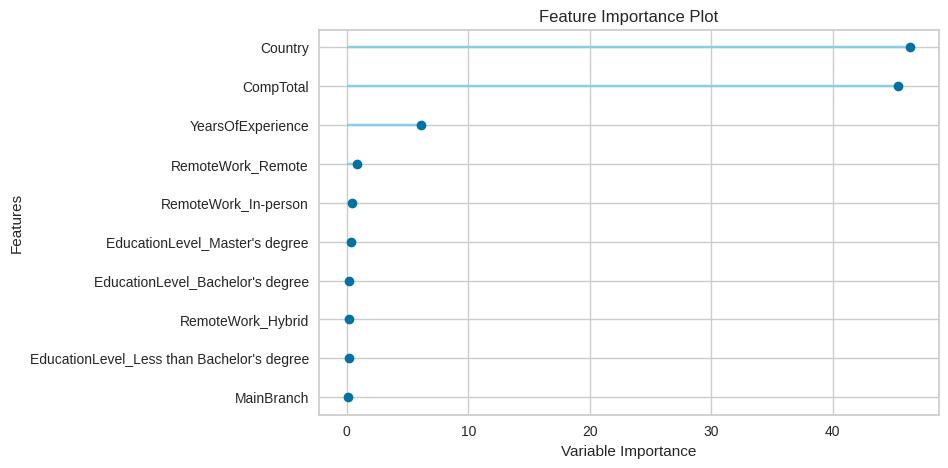

In [15]:
plot_model(best_model, plot = 'feature')

## Step 8 : Deploy

- **predict model**

In [16]:
# predict on hold-out
predict_model(best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,3887.6275,133042729.3945,11534.4150,0.9284,0.2061,0.0924


,CompTotal,YearsOfExperience,MainBranch,Country,EducationLevel,RemoteWork,Salary,prediction_label
4842,103000.0,6.0,Profession,United States of America,Master's degree,Hybrid,103000.0,102577.125161
3518,62000.0,9.0,Profession,Germany,Master's degree,Remote,66592.0,66348.260207
9203,39000.0,4.0,Profession,Ukraine,Master's degree,Remote,39000.0,40392.463392
326,95000.0,9.0,Profession,Greece,Bachelor's degree,Remote,102036.0,99956.451372
984,19200.0,7.0,Profession,Other,Bachelor's degree,Remote,19200.0,18252.697191
...,...,...,...,...,...,...,...,...
327,70000.0,6.0,Profession,Other,Bachelor's degree,Remote,70000.0,65151.153356
1277,192000.0,6.0,Profession,Poland,Bachelor's degree,Remote,47513.0,53354.092099
5814,198000.0,5.0,Profession,Mexico,Less than Bachelor's degree,Remote,10674.0,24514.806607
8286,51250.0,7.0,Profession,Spain,Bachelor's degree,Remote,55046.0,55262.713516


- **Finalize model**

In [17]:
# finalize a model
best_model_pipeline = finalize_model(best_model)
best_model_pipeline

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['CompTotal', 'YearsOfExperience'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['MainBranch', 'Country',
                                             'EducationLevel', 'RemoteWork'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerWra...
                                    transformer=OneHotEncoder(cols=['EducationLevel',
                                                                    'RemoteWork'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('rest_encoding',
                 TransformerWrapper(include=['Country'],
                                    transformer=TargetEncoder(cols=['Country'],
                                                              handle_missing='return_nan'))),
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ('actual_estimator',
                 <catboost.core.CatBoostRegressor object at 0x7ac385a30610>)])

- **Save model**

In [18]:
# save pipeline
# model_path = r'C:\Users\Afshin\Desktop\10_Projects\Project_3_Developer_Salary_Prediction\models\best_model_pipeline_pycaret_wandb_CatBoostRegressor'
model_path = r'/content/drive/My Drive/Applied Machine Learning/Project 3 : Developer Salary Prediction/models/best_model_pipeline_pycaret_wandb_CatBoostRegressor'

save_model(best_model_pipeline, model_path)
print(f"> The best model pipeline Saved to {model_path}")

Transformation Pipeline and Model Successfully Saved
> The best model pipeline Saved to /content/drive/My Drive/Applied Machine Learning/Project 3 : Developer Salary Prediction/models/best_model_pipeline_pycaret_wandb_CatBoostRegressor


- **Load model**

In [19]:
# load pipeline
loaded_best_model_pipeline = load_model(model_path)
loaded_best_model_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['CompTotal', 'YearsOfExperience'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['MainBranch', 'Country',
                                             'EducationLevel', 'RemoteWork'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 Tra...
                                    transformer=OneHotEncoder(cols=['EducationLevel',
                                                                    'RemoteWork'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('rest_encoding',
                 TransformerWrapper(include=['Country'],
                                    transformer=TargetEncoder(cols=['Country'],
                                                              handle_missing='return_nan'))),
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ('actual_estimator',
                 <catboost.core.CatBoostRegressor object at 0x7ac385b8dea0>)])

- **Create app**

In [20]:
# create app
create_app(loaded_best_model_pipeline)

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://eec5f9904840f41162.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## Step 9 : Make Predictions

- Find a sample

In [21]:
sample = df.sample(1)
sample_pred = predict_model(loaded_best_model_pipeline, data= sample)
sample_price_pred = sample_pred[['Salary', 'prediction_label']]
sample_price_pred

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,853.9901,729299.0218,853.9901,nan,0.0083,0.0083


,Salary,prediction_label
4842,103000.0,103853.99006


- Get a sample

In [23]:
# Make predictions on new data
new_data = pd.DataFrame([{
    'CompTotal': 200000,
    'YearsOfExperience': 3,
    'MainBranch': 'Profession',
    'Country': 'Germany',
    'EducationLevel': "Bachelor's degree",
    'RemoteWork': 'Remote',
    }])
new_data_pred = predict_model(loaded_best_model_pipeline, data= new_data)
new_data_pred

,CompTotal,YearsOfExperience,MainBranch,Country,EducationLevel,RemoteWork,prediction_label
0,200000,3,Profession,Germany,Bachelor's degree,Remote,146518.155119
